In [12]:
#importing libraris
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [13]:
#defining a path
path=r'C:\Users\banda\Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','df_with_flag_final.pkl'))

In [14]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,Number_of_dependants,Family_status,income,region,cust-5_flag,age_group,income_Group,department
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Adult,Low income,beverages


In [15]:
df.shape

(30964564, 34)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 34 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   order_number            int32         
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float64       
 6   product_id              object        
 7   add_to_cart_order       int32         
 8   reordered               int32         
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int32         
 12  prices                  float64       
 13  price_range_loc         object        
 14  busiest_period_of_day   object        
 15  busiest_days            object        
 16  max_order               int32         
 17  loyalty_flag            object        
 18  

In [41]:
#creating subset to avoid RAm ISsues
Sub_df=df[['department','Order_frequency_flag','median_ordering','busiest_days','loyalty_flag','Family_status','age_group','order_id','reordered','region','days_since_prior_order','order_number']]

#### loyal falg and reordering habits

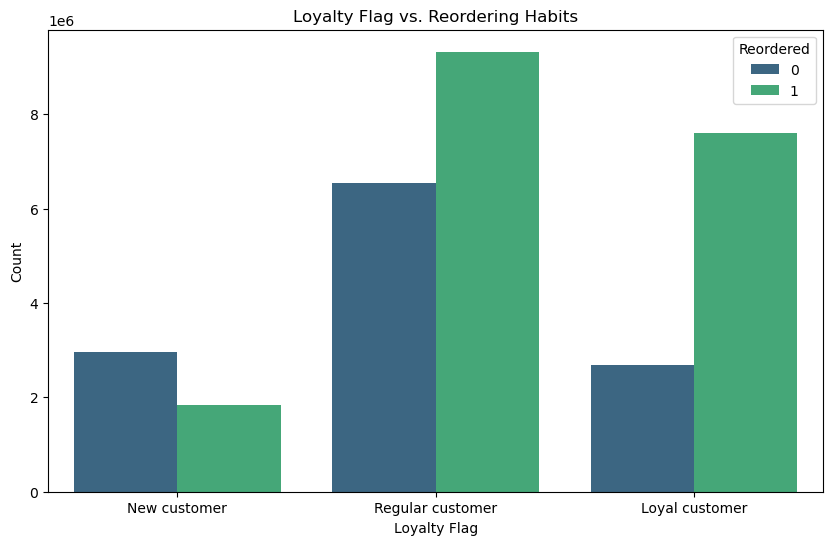

In [23]:
plt.figure(figsize=(10, 6))
llrh=sns.countplot(x='loyalty_flag', hue='reordered', data=Sub_df, palette='viridis')

plt.title('Loyalty Flag vs. Reordering Habits')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.legend(title='Reordered', loc='upper right')

plt.show()

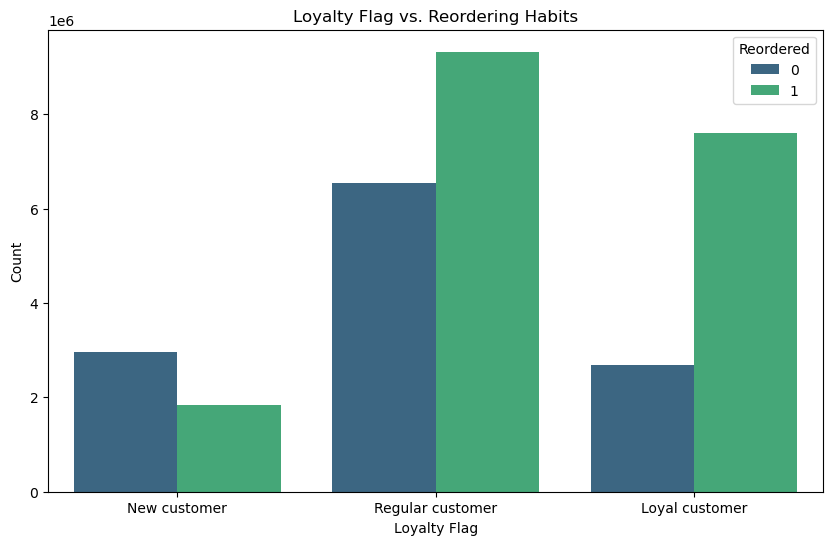

In [24]:
llrh.figure

Evaluate
even througth Loyal customer have been with intacart for longer, regular customer are the one who are reordering more often.

In [25]:
llrh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty-reordering.png')) #to export data visualization

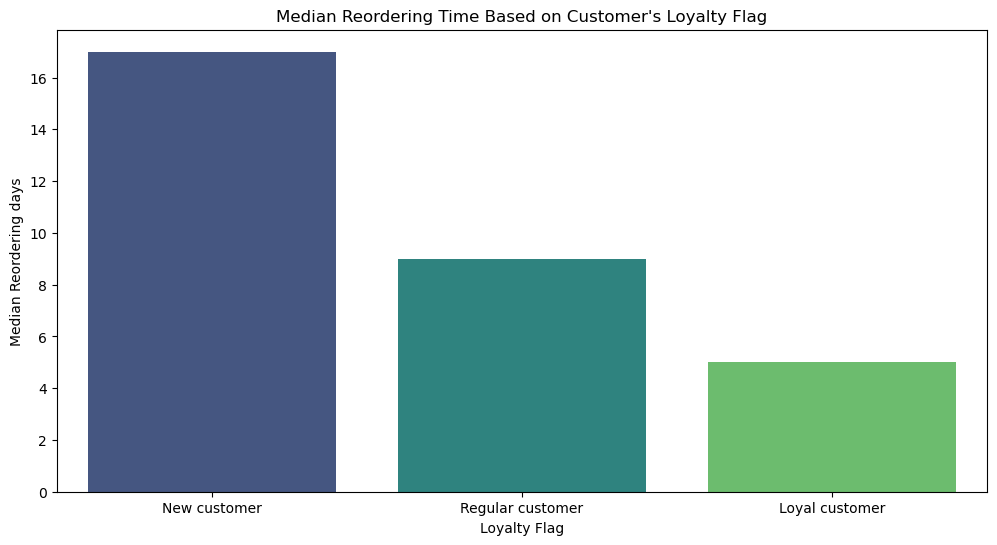

In [36]:
plt.figure(figsize=(12, 6))
LMord=sns.barplot(x='loyalty_flag', y='median_ordering', data=Sub_df, estimator='median', palette='viridis')

plt.title('Median Reordering Time Based on Customer\'s Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Median Reordering days')
plt.show()

New customers are ordering every 16 days where as regular custermore are order every 9 days in average and loyal customer are orderding every 6th day

In [37]:
LMord.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty-medianreordering.png')) #to export data visualization

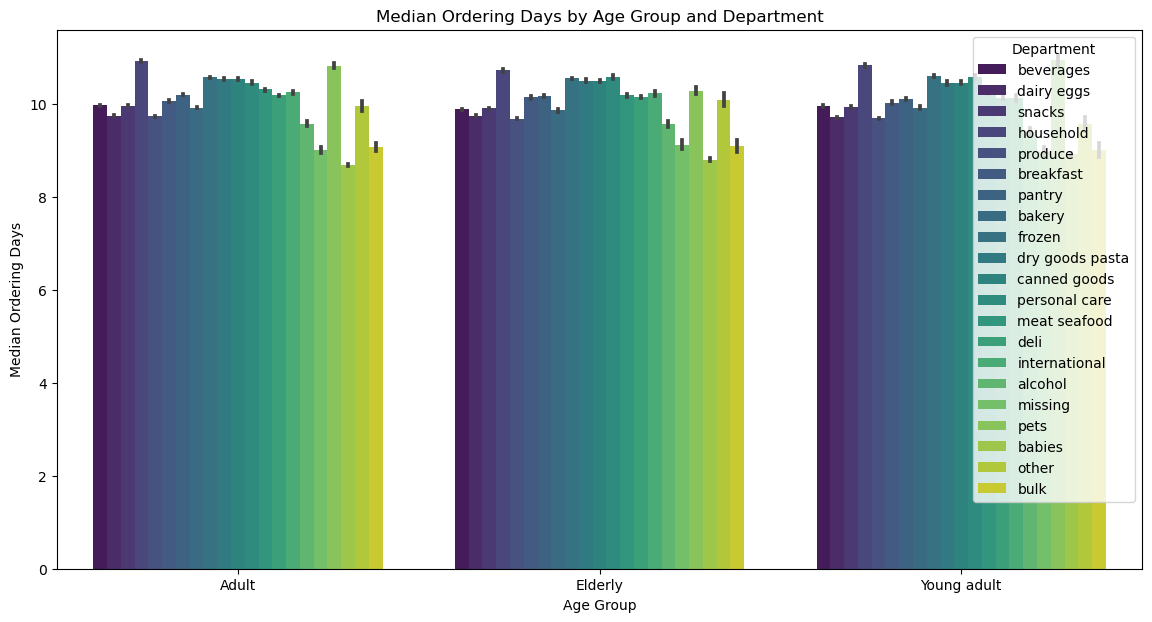

In [43]:
plt.figure(figsize=(14, 7))

# Bar plot for age group and department with median ordering days as bar heights
age_dep=sns.barplot(x='age_group', y='median_ordering', hue='department', data=Sub_df, palette='viridis')

plt.title('Median Ordering Days by Age Group and Department')
plt.xlabel('Age Group')
plt.ylabel('Median Ordering Days')
plt.legend(title='Department', loc='upper right')

plt.show()

#### Familty Status and the Produce they purchase

<Figure size 1200x800 with 0 Axes>

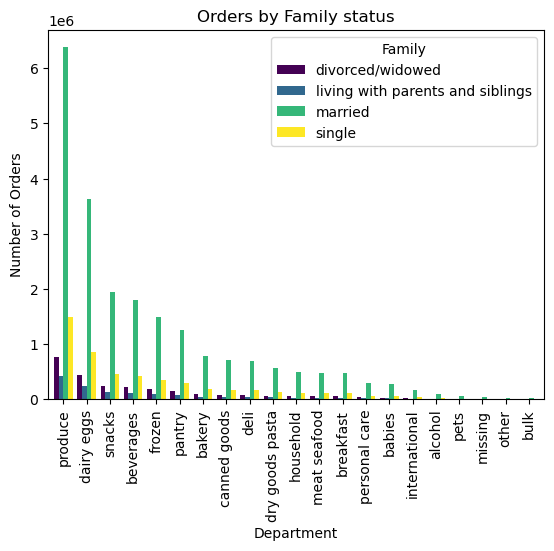

In [53]:
pivot_df = Sub_df.pivot_table(index='department', columns='Family_status', values='order_number', aggfunc='count', fill_value=0)
pivot_df['TotalOrders'] = pivot_df.sum(axis=1)
plt.figure(figsize=(12, 8))
sorted_df = pivot_df.sort_values(by='TotalOrders', ascending=False)
sorted_df.drop('TotalOrders', axis=1, inplace=True)

barchar=sorted_df.plot(kind='bar', cmap='viridis', width=0.8)  # Adjust width as needed

# Customize the plot
plt.title('Orders by Family status')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.legend(title='Family')

# Show the plot
plt.show()

In [54]:
barchar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_family_department.png')) #to export data visualization